<a href="https://colab.research.google.com/github/breneroliveira/cancer-prediction/blob/main/Projeto_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Termos técnicos</h3>

<p><strong>Estadiamento</strong>: estadiamento é o processo para determinar a localização e a extensão do câncer presente no corpo de uma pessoa. É a forma como o médico determina o avanço da doença no organismo de um paciente.</p>

<h3>Dicionário de dados</h3>

<p><strong>TIP_TRAT</strong>: refere-se ao procedimento do primeiro tratamento.
Podendo ser cirurgia, quimioterapia, radioterapia e ambos (quimioterapia mais
radioterapia com a mesma data de tratamento).</p>
<p><strong>ESTADIAM</strong>: refere-se ao estadiamento registrado nos tratamentos de quimioterapia, radioterapia e ambos.</p>
<p><strong>DIAS_ENTRE_DIAG_TRAT</strong>: intervalo de tempo em dias entre a data de diagnóstico e a data do primeiro tratamento registrado.</p>
<p><strong>Primeiro_Tratamento</strong>: data detalhada do primeiro tratamento.</p>

In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path2020 = '/content/drive/MyDrive/2024-2/TCC 2/G1/Projeto/Datasets/POBR2020.csv'
path2021 = '/content/drive/MyDrive/2024-2/TCC 2/G1/Projeto/Datasets/POBR2021.csv'
path2022 = '/content/drive/MyDrive/2024-2/TCC 2/G1/Projeto/Datasets/POBR2022.csv'
path2023 = '/content/drive/MyDrive/2024-2/TCC 2/G1/Projeto/Datasets/POBR2023.csv'
path2024 = '/content/drive/MyDrive/2024-2/TCC 2/G1/Projeto/Datasets/POBR2024.csv'

df_2020 = pd.read_csv(path2020)
df_2021 = pd.read_csv(path2021)
df_2022 = pd.read_csv(path2022)
df_2023 = pd.read_csv(path2023)
df_2024 = pd.read_csv(path2024)

In [ ]:
df_raw = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)

In [ ]:
df_raw.info() # O schema de todos os datasets é igual

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736602 entries, 0 to 2736601
Data columns (total 23 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ANO_DIAGN   int64  
 1   ANOMES_DIA  int64  
 2   ANO_TRATAM  float64
 3   ANOMES_TRA  float64
 4   UF_RESID    int64  
 5   MUN_RESID   int64  
 6   UF_TRATAM   float64
 7   MUN_TRATAM  float64
 8   UF_DIAGN    int64  
 9   MUN_DIAG    int64  
 10  TRATAMENTO  int64  
 11  DIAGNOSTIC  int64  
 12  IDADE       int64  
 13  SEXO        object 
 14  ESTADIAM    float64
 15  CNES_DIAG   int64  
 16  CNES_TRAT   float64
 17  TEMPO_TRAT  float64
 18  CNS_PAC     float64
 19  DIAG_DETH   object 
 20  DT_DIAG     object 
 21  DT_TRAT     object 
 22  DT_NASC     object 
dtypes: float64(8), int64(10), object(5)
memory usage: 480.2+ MB


In [ ]:
# df_raw[(df_raw['UF_RESID'] == '35') & (df_raw['MUN_RESID'] == '352940')]

In [ ]:
# df_raw['ANO_DIAGN'] = df_raw['ANO_DIAGN'].astype('string')
# df_raw['ANO_DIAGN'] = df_raw['DT_NASC'].astype('string')

df_raw = df_raw.astype({'ESTADIAM': 'Int64'})

df_raw = df_raw.astype({'ANO_DIAGN': 'string', 'ANOMES_DIA': 'string', 'ANO_TRATAM': 'string',
                        'ANOMES_TRA': 'string', 'UF_RESID': 'string', 'MUN_RESID': 'string',
                        'UF_TRATAM': 'string', 'MUN_TRATAM': 'string', 'UF_DIAGN': 'string',
                        'MUN_DIAG': 'string', 'TRATAMENTO': 'string', 'DIAGNOSTIC': 'string',
                        'IDADE': 'string', 'SEXO': 'string', 'ESTADIAM': 'string', 'CNES_DIAG': 'string',
                        'CNES_TRAT': 'string', 'TEMPO_TRAT': 'Int64', 'CNS_PAC': 'string', 'DIAG_DETH': 'string',
                        'DT_DIAG': 'string', 'DT_TRAT': 'string', 'DT_NASC': 'string'})
                        # , 'DT_DIAG': 'datetime64[ns]', 'DT_TRAT': 'datetime64[ns]'
                        # , 'DT_NASC': 'datetime64[ns]'

In [ ]:
df_raw['DT_DIAG'] = pd.to_datetime(df_raw['DT_DIAG'], format='%d/%m/%Y')
df_raw['DT_DIAG'] = df_raw['DT_DIAG'].dt.strftime('%d/%m/%Y')

df_raw['DT_TRAT'] = pd.to_datetime(df_raw['DT_TRAT'], format='%d/%m/%Y')
df_raw['DT_TRAT'] = df_raw['DT_TRAT'].dt.strftime('%d/%m/%Y')

df_raw['DT_NASC'] = pd.to_datetime(df_raw['DT_NASC'], format='%d/%m/%Y')
df_raw['DT_NASC'] = df_raw['DT_NASC'].dt.strftime('%d/%m/%Y')

# df_raw = df_raw.astype({'DT_DIAG': 'datetime64[ns]'})

In [ ]:
df_raw[['DT_DIAG', 'DT_TRAT', 'DT_NASC']].head(5)

,DT_DIAG,DT_TRAT,DT_NASC
0,29/06/2020,20/10/2020,10/05/1947
1,02/12/2020,02/12/2020,25/10/1933
2,28/01/2020,22/05/2020,10/03/1947
3,24/01/2020,26/06/2020,26/10/1965
4,01/12/2020,01/12/2020,20/03/1982


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736602 entries, 0 to 2736601
Data columns (total 23 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   ANO_DIAGN   string
 1   ANOMES_DIA  string
 2   ANO_TRATAM  string
 3   ANOMES_TRA  string
 4   UF_RESID    string
 5   MUN_RESID   string
 6   UF_TRATAM   string
 7   MUN_TRATAM  string
 8   UF_DIAGN    string
 9   MUN_DIAG    string
 10  TRATAMENTO  string
 11  DIAGNOSTIC  string
 12  IDADE       string
 13  SEXO        string
 14  ESTADIAM    string
 15  CNES_DIAG   string
 16  CNES_TRAT   string
 17  TEMPO_TRAT  Int64 
 18  CNS_PAC     string
 19  DIAG_DETH   string
 20  DT_DIAG     object
 21  DT_TRAT     object
 22  DT_NASC     object
dtypes: Int64(1), object(3), string(19)
memory usage: 482.8+ MB


In [ ]:
path_cod_municipio = '/content/drive/MyDrive/2024-2/TCC 2/G1/Projeto/Datasets/IBGE/RELATORIO_DTB_BRASIL_MUNICIPIO.CSV'

df_cod_municipio = pd.read_csv(path_cod_municipio, encoding='ISO-8859-1', sep = ';')

In [ ]:
df_cod_municipio

,UF,Nome_UF,Região Geográfica Intermediária,Nome Região Geográfica Intermediária,Região Geográfica Imediata,Nome Região Geográfica Imediata,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Município,Código Município Completo,Nome_Município
0,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,2,Leste Rondoniense,6,Cacoal,15,1100015,Alta Floresta D'Oeste
1,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,2,Leste Rondoniense,6,Cacoal,379,1100379,Alto Alegre dos Parecis
2,11,Rondônia,1101,Porto Velho,110002,Ariquemes,2,Leste Rondoniense,3,Ariquemes,403,1100403,Alto Paraíso
3,11,Rondônia,1102,Ji-Paraná,110004,Ji-Paraná,2,Leste Rondoniense,5,Alvorada D'Oeste,346,1100346,Alvorada D'Oeste
4,11,Rondônia,1101,Porto Velho,110002,Ariquemes,2,Leste Rondoniense,3,Ariquemes,23,1100023,Ariquemes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,52,Goiás,5201,Goiânia,520002,Anápolis,5,Sul Goiano,16,Pires do Rio,22005,5222005,Vianópolis
5566,52,Goiás,5202,Itumbiara,520009,Piracanjuba,5,Sul Goiano,15,Meia Ponte,22054,5222054,Vicentinópolis
5567,52,Goiás,5206,Luziânia - Águas Lindas de Goiás,520022,Flores de Goiás,4,Leste Goiano,12,Entorno de Brasília,22203,5222203,Vila Boa
5568,52,Goiás,5205,Porangatu - Uruaçu,520018,Ceres - Rialma - Goianésia,4,Leste Goiano,12,Entorno de Brasília,22302,5222302,Vila Propício


In [ ]:
df_cod_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   UF                                    5570 non-null   int64 
 1   Nome_UF                               5570 non-null   object
 2   Região Geográfica Intermediária       5570 non-null   int64 
 3   Nome Região Geográfica Intermediária  5570 non-null   object
 4   Região Geográfica Imediata            5570 non-null   int64 
 5   Nome Região Geográfica Imediata       5570 non-null   object
 6   Mesorregião Geográfica                5570 non-null   int64 
 7   Nome_Mesorregião                      5570 non-null   object
 8   Microrregião Geográfica               5570 non-null   int64 
 9   Nome_Microrregião                     5570 non-null   object
 10  Município                             5570 non-null   int64 
 11  Código Município Completo     

In [ ]:
df_cod_municipio = df_cod_municipio.astype({'UF': 'string', 'Nome_UF': 'string', 'Região Geográfica Intermediária': 'string',
                        'Nome Região Geográfica Intermediária': 'string', 'Região Geográfica Imediata': 'string', 'Nome Região Geográfica Imediata': 'string',
                        'Mesorregião Geográfica': 'string', 'Nome_Mesorregião': 'string', 'Microrregião Geográfica': 'string', 'Nome_Microrregião': 'string',
                        'Município': 'string', 'Código Município Completo': 'string', 'Nome_Município': 'string'})

In [ ]:
df_cod_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   UF                                    5570 non-null   string
 1   Nome_UF                               5570 non-null   string
 2   Região Geográfica Intermediária       5570 non-null   string
 3   Nome Região Geográfica Intermediária  5570 non-null   string
 4   Região Geográfica Imediata            5570 non-null   string
 5   Nome Região Geográfica Imediata       5570 non-null   string
 6   Mesorregião Geográfica                5570 non-null   string
 7   Nome_Mesorregião                      5570 non-null   string
 8   Microrregião Geográfica               5570 non-null   string
 9   Nome_Microrregião                     5570 non-null   string
 10  Município                             5570 non-null   string
 11  Código Município Completo     

In [ ]:
df_cod_municipio['Código Município Completo'] = df_cod_municipio['Código Município Completo'].str[:6]

df_joined = df_raw.join(df_cod_municipio.set_index('Código Município Completo'), on='MUN_RESID', how='inner')

In [ ]:
df_joined[['UF', 'Nome_UF', 'MUN_RESID', 'Nome_Município', 'TRATAMENTO', 'ESTADIAM', 'DIAGNOSTIC', 'DIAG_DETH', 'DT_DIAG', 'DT_TRAT', 'TEMPO_TRAT']] \
            .head(50).groupby(['UF', 'Nome_UF',	'MUN_RESID',	'Nome_Município', 'TRATAMENTO',	'ESTADIAM',	'DIAGNOSTIC',	'DIAG_DETH',	'DT_DIAG',	'DT_TRAT', 'TEMPO_TRAT']).count()

Empty DataFrame
Columns: []
Index: [(50, Mato Grosso do Sul, 500290, Cassilândia, 1, 5, 1, C18, 13/07/2020, 13/07/2020, 0), (50, Mato Grosso do Sul, 500290, Cassilândia, 1, 5, 1, C49, 18/08/2020, 18/08/2020, 0), (50, Mato Grosso do Sul, 500290, Cassilândia, 1, 5, 1, C62, 01/09/2020, 01/09/2020, 0), (50, Mato Grosso do Sul, 500290, Cassilândia, 1, 5, 1, C64, 04/10/2020, 04/10/2020, 0), (50, Mato Grosso do Sul, 500290, Cassilândia, 1, 5, 2, D07, 03/09/2020, 03/09/2020, 0), (50, Mato Grosso do Sul, 500290, Cassilândia, 2, 2, 1, C61, 29/06/2020, 20/10/2020, 113), (50, Mato Grosso do Sul, 500290, Cassilândia, 2, 3, 1, C25, 06/08/2020, 31/08/2020, 25), (50, Mato Grosso do Sul, 500290, Cassilândia, 2, 3, 1, C50, 29/05/2020, 28/08/2020, 91), (50, Mato Grosso do Sul, 500290, Cassilândia, 2, 4, 1, C01, 10/02/2020, 19/06/2020, 130), (50, Mato Grosso do Sul, 500290, Cassilândia, 2, 4, 1, C20, 18/06/2020, 27/07/2020, 39), (50, Mato Grosso do Sul, 500290, Cassilândia, 2, 4, 1, C23, 16/10/2020, 10/12/2020, 55), (50, Mato Grosso do Sul, 500290, Cassilândia, 2, 4, 1, C34, 14/04/2020, 13/05/2020, 29), (50, Mato Grosso do Sul, 500290, Cassilândia, 2, 4, 1, C40, 05/06/2020, 06/07/2020, 31)]

In [ ]:
df_joined

,ANO_DIAGN,ANOMES_DIA,ANO_TRATAM,ANOMES_TRA,UF_RESID,MUN_RESID,UF_TRATAM,MUN_TRATAM,UF_DIAGN,MUN_DIAG,...,Região Geográfica Intermediária,Nome Região Geográfica Intermediária,Região Geográfica Imediata,Nome Região Geográfica Imediata,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Município,Nome_Município
0,2020,202006,2020.0,202010.0,50,500290,50.0,500830.0,50,500830,...,5001,Campo Grande,500003,Paranaíba - Chapadão do Sul - Cassilândia,3,Leste de Mato Grosso do Sul,5,Cassilândia,2902,Cassilândia
10636,2020,202003,2022.0,202208.0,50,500290,35.0,350550.0,35,350550,...,5001,Campo Grande,500003,Paranaíba - Chapadão do Sul - Cassilândia,3,Leste de Mato Grosso do Sul,5,Cassilândia,2902,Cassilândia
15688,2020,202003,<NA>,<NA>,50,500290,<NA>,<NA>,35,352480,...,5001,Campo Grande,500003,Paranaíba - Chapadão do Sul - Cassilândia,3,Leste de Mato Grosso do Sul,5,Cassilândia,2902,Cassilândia
31766,2020,202006,<NA>,<NA>,50,500290,<NA>,<NA>,50,500830,...,5001,Campo Grande,500003,Paranaíba - Chapadão do Sul - Cassilândia,3,Leste de Mato Grosso do Sul,5,Cassilândia,2902,Cassilândia
32948,2020,202002,2020.0,202002.0,50,500290,50.0,500270.0,50,500270,...,5001,Campo Grande,500003,Paranaíba - Chapadão do Sul - Cassilândia,3,Leste de Mato Grosso do Sul,5,Cassilândia,2902,Cassilândia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807311,2023,202301,2023.0,202301.0,13,130006,13.0,130260.0,13,130260,...,1302,Tefé,130006,Tabatinga,2,Sudoeste Amazonense,3,Alto Solimões,60,Amaturá
1832373,2023,202310,<NA>,<NA>,13,130006,<NA>,<NA>,13,130260,...,1302,Tefé,130006,Tabatinga,2,Sudoeste Amazonense,3,Alto Solimões,60,Amaturá
2578198,2024,202402,2024.0,202402.0,13,130006,13.0,130260.0,13,130260,...,1302,Tefé,130006,Tabatinga,2,Sudoeste Amazonense,3,Alto Solimões,60,Amaturá
2601801,2024,202402,2024.0,202402.0,13,130006,13.0,130260.0,13,130260,...,1302,Tefé,130006,Tabatinga,2,Sudoeste Amazonense,3,Alto Solimões,60,Amaturá


In [ ]:
df = df_joined[['Nome_UF', 'Nome_Município', 'TRATAMENTO', 'ESTADIAM', 'DIAGNOSTIC', 'DIAG_DETH', 'DT_DIAG', 'DT_TRAT', 'TEMPO_TRAT']]#.dropna()

In [ ]:
pd.options.mode.copy_on_write = True # Copy-on-Write resolve a modificação acidental de mais de um objeto, ele explicitamente desautoriza a modificação

df.rename(columns = {
        'Nome_UF': 'NOME_UF',
        'Nome_Município': 'NOME_MUN',
        'TRATAMENTO': 'TIP_TRAT', # 'TRATAMENTO': 'TIPO_TRATAMENTO',
        # 'ESTADIAM': 'ESTADIAMENTO',
        'DIAGNOSTIC': 'CATEG_DIAG', # 'DIAGNOSTIC': 'CATEGORIA_DIAGNOSTICO',
        'DIAG_DETH': 'DIAG_DET',# 'DIAG_DETH': 'DIAGNOSTICO_DETALHADO',
        # 'DT_DIAG': 'DATA_DIAGNOSTICO',
        'DT_TRAT': 'DT_PRIM_TRAT',# 'DT_TRAT': 'DATA_PRIMEIRO_TRATAMENTO',
        'TEMPO_TRAT': 'DIAS_ENTRE_DIAG_TRAT'}, inplace = True)

In [ ]:
# df[(df['DIAGNOSTICO_DETALHADO'] == 'C50') & (df['DIAS_ENTRE_DIAG_TRAT'] < 0)]#.head(10)
df = df[(df['DIAG_DET'] == 'C50')
      & (df['TIP_TRAT'] != '1')
      & (df['ESTADIAM'] != '5')
      & (df['ESTADIAM'] != '9')] #.head(10)
df = df.reset_index()

In [ ]:
df = df.drop(columns = ['index'])
df

,NOME_UF,NOME_MUN,TIP_TRAT,ESTADIAM,CATEG_DIAG,DIAG_DET,DT_DIAG,DT_PRIM_TRAT,DIAS_ENTRE_DIAG_TRAT
0,Mato Grosso do Sul,Cassilândia,2,3,1,C50,29/05/2020,28/08/2020,91
1,Mato Grosso do Sul,Cassilândia,2,4,1,C50,12/02/2021,07/07/2021,145
2,Mato Grosso do Sul,Cassilândia,2,2,1,C50,15/06/2021,16/11/2021,154
3,Mato Grosso do Sul,Cassilândia,2,3,1,C50,03/08/2021,12/08/2021,9
4,Mato Grosso do Sul,Cassilândia,2,2,1,C50,21/11/2022,25/04/2023,155
...,...,...,...,...,...,...,...,...,...
150593,Rio Grande do Sul,Pedras Altas,3,1,1,C50,22/03/2022,05/07/2022,105
150594,Rio Grande do Sul,Pedras Altas,2,3,1,C50,07/03/2023,06/12/2023,274
150595,Maranhão,São Pedro dos Crentes,2,2,1,C50,14/06/2023,01/09/2023,79
150596,Maranhão,São Pedro dos Crentes,2,2,1,C50,25/09/2023,01/02/2024,129


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150598 entries, 0 to 150597
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   NOME_UF               150598 non-null  string
 1   NOME_MUN              150598 non-null  string
 2   TIP_TRAT              150598 non-null  string
 3   ESTADIAM              150598 non-null  string
 4   CATEG_DIAG            150598 non-null  string
 5   DIAG_DET              150598 non-null  string
 6   DT_DIAG               150598 non-null  object
 7   DT_PRIM_TRAT          150598 non-null  object
 8   DIAS_ENTRE_DIAG_TRAT  150598 non-null  Int64 
dtypes: Int64(1), object(2), string(6)
memory usage: 10.5+ MB


In [ ]:
#df_unique = pd.values_(df.ESTADIAMENTO).astype(int)
#df.drop_duplicates(subset=['ESTADIAMENTO']).sort_values('ESTADIAMENTO')
#df.ESTADIAMENTO.value_counts()
df['ESTADIAM'].sort_values(ascending = True).unique() # Se não for valores contínuos, dá para converter para categóricos (string)

<StringArray>
['0', '1', '2', '3', '4']
Length: 5, dtype: string

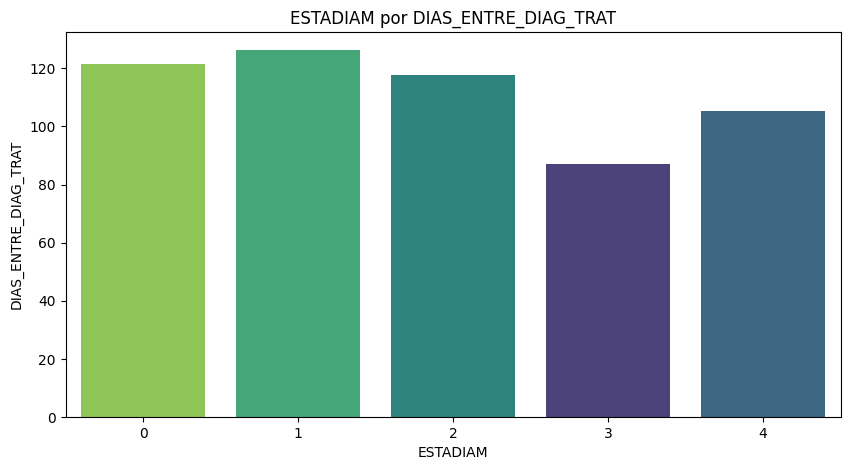

In [ ]:
# df_no_9 = df[df['ESTADIAM'] != '9']

plt.figure(figsize = (10, 5))
sns.barplot(data = df,
            x = 'ESTADIAM',
            y = 'DIAS_ENTRE_DIAG_TRAT',
            palette = 'viridis',
            hue = 'ESTADIAM',
            legend = False,
            errorbar = None,
            order = ['0', '1', '2', '3', '4']
            ).set_title('ESTADIAM por DIAS_ENTRE_DIAG_TRAT')
plt.xticks(rotation = 0)

plt.show()